In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
import datetime

In [2]:
df = pd.read_csv('../data/consolidated_data/training_dataset.csv')
df.drop(columns=['Unnamed: 0', "state","cases_new_capita"], inplace=True)
df["date"] = pd.to_datetime(df["date"])
df_all = df.copy()
df_all = df_all.groupby('date').sum()
df = df[df["date"] >= "2021-01-01"]
df = df.groupby('date').sum()
df_var = df.copy()

In [3]:
col_name = df.columns.tolist()

for col in col_name:
    for i in range(1, 3):
        df[f"{col}_lag_{i}"] = df[col].shift(i)

pd.set_option('display.max_columns', None)

df.dropna(inplace=True)

print(df.shape)
print(df)

for col in col_name:
    for i in range(1, 3):
        df_all[f"{col}_lag_{i}"] = df_all[col].shift(i)

pd.set_option('display.max_columns', None)

df_all.dropna(inplace=True)


(1204, 75)
            cases_new  cases_recovered  cases_active  cases_unvax  cases_pvax  \
date                                                                            
2021-01-03       1704             2726         21366         1704           0   
2021-01-04       1741             1010         22090         1741           0   
2021-01-05       2027             1221         22885         2027           0   
2021-01-06       2593             1129         24348         2593           0   
2021-01-07       3027             2145         25222         3027           0   
...               ...              ...           ...          ...         ...   
2024-04-16        110               44          7736           21           1   
2024-04-17        125               40          7821           20           0   
2024-04-18        134               31          7924           12           0   
2024-04-19        135               21          8038           20           1   
2024-04-20       

In [4]:
split_index = int(0.8 * len(df))
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

pd.set_option('display.max_columns', None)

split_index = int(0.5 * len(df_all))
train_data_all = df_all.iloc[:split_index]
test_data_all = df_all.iloc[split_index:]

print("Training data shape:", train_data_all.shape)
print("Testing data shape:", test_data_all.shape, test_data_all)

Training data shape: (773, 75)
Testing data shape: (773, 75)             cases_new  cases_recovered  cases_active  cases_unvax  cases_pvax  \
date                                                                            
2022-03-10      30787            26457        314427         4429         668   
2022-03-11      32800            24444        322707         4756         769   
2022-03-12      26250            25089        323791         3545         692   
2022-03-13      22535            25356        320883         3207         502   
2022-03-14      22030            33872        308949         3109         547   
...               ...              ...           ...          ...         ...   
2024-04-16        110               44          7736           21           1   
2024-04-17        125               40          7821           20           0   
2024-04-18        134               31          7924           12           0   
2024-04-19        135               21          

In [5]:
df.head()

,cases_new,cases_recovered,cases_active,cases_unvax,cases_pvax,cases_fvax,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80,daily_partial,daily,admitted_covid_hospital,admitted_total_hospital,discharged_covid_hospital,discharged_total_hospital,hosp_covid_hospital,icu_covid,vent_covid,cases_new_lag_1,cases_new_lag_2,cases_recovered_lag_1,cases_recovered_lag_2,cases_active_lag_1,cases_active_lag_2,cases_unvax_lag_1,cases_unvax_lag_2,cases_pvax_lag_1,cases_pvax_lag_2,cases_fvax_lag_1,cases_fvax_lag_2,cases_0_4_lag_1,cases_0_4_lag_2,cases_5_11_lag_1,cases_5_11_lag_2,cases_12_17_lag_1,cases_12_17_lag_2,cases_18_29_lag_1,cases_18_29_lag_2,cases_30_39_lag_1,cases_30_39_lag_2,cases_40_49_lag_1,cases_40_49_lag_2,cases_50_59_lag_1,cases_50_59_lag_2,cases_60_69_lag_1,cases_60_69_lag_2,cases_70_79_lag_1,cases_70_79_lag_2,cases_80_lag_1,cases_80_lag_2,daily_partial_lag_1,daily_partial_lag_2,daily_lag_1,daily_lag_2,admitted_covid_hospital_lag_1,admitted_covid_hospital_lag_2,admitted_total_hospital_lag_1,admitted_total_hospital_lag_2,discharged_covid_hospital_lag_1,discharged_covid_hospital_lag_2,discharged_total_hospital_lag_1,discharged_total_hospital_lag_2,hosp_covid_hospital_lag_1,hosp_covid_hospital_lag_2,icu_covid_lag_1,icu_covid_lag_2,vent_covid_lag_1,vent_covid_lag_2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-03,1704,2726,21366,1704,0,0,63,107,71,522,443,202,140,79,26,9,0.0,0.0,691.0,797.0,405.0,477.0,3215.0,204.0,90.0,2295.0,2068.0,3321.0,2230.0,22399.0,23434.0,2295.0,2068.0,0.0,0.0,0.0,0.0,40.0,59.0,82.0,70.0,60.0,78.0,717.0,640.0,722.0,710.0,316.0,238.0,140.0,127.0,89.0,72.0,19.0,36.0,5.0,7.0,0.0,0.0,0.0,0.0,668.0,555.0,766.0,674.0,463.0,432.0,548.0,532.0,3063.0,3012.0,197.0,194.0,85.0,85.0
2021-01-04,1741,1010,22090,1741,0,0,71,107,72,580,406,229,131,71,23,9,0.0,0.0,631.0,756.0,352.0,453.0,3280.0,199.0,100.0,1704.0,2295.0,2726.0,3321.0,21366.0,22399.0,1704.0,2295.0,0.0,0.0,0.0,0.0,63.0,40.0,107.0,82.0,71.0,60.0,522.0,717.0,443.0,722.0,202.0,316.0,140.0,140.0,79.0,89.0,26.0,19.0,9.0,5.0,0.0,0.0,0.0,0.0,691.0,668.0,797.0,766.0,405.0,463.0,477.0,548.0,3215.0,3063.0,204.0,197.0,90.0,85.0
2021-01-05,2027,1221,22885,2027,0,0,76,100,87,627,537,256,190,80,36,9,0.0,0.0,723.0,843.0,425.0,508.0,3441.0,200.0,101.0,1741.0,1704.0,1010.0,2726.0,22090.0,21366.0,1741.0,1704.0,0.0,0.0,0.0,0.0,71.0,63.0,107.0,107.0,72.0,71.0,580.0,522.0,406.0,443.0,229.0,202.0,131.0,140.0,71.0,79.0,23.0,26.0,9.0,9.0,0.0,0.0,0.0,0.0,631.0,691.0,756.0,797.0,352.0,405.0,453.0,477.0,3280.0,3215.0,199.0,204.0,100.0,90.0
2021-01-06,2593,1129,24348,2593,0,0,60,77,68,786,730,311,141,78,32,12,0.0,0.0,691.0,816.0,493.0,579.0,3436.0,223.0,118.0,2027.0,1741.0,1221.0,1010.0,22885.0,22090.0,2027.0,1741.0,0.0,0.0,0.0,0.0,76.0,71.0,100.0,107.0,87.0,72.0,627.0,580.0,537.0,406.0,256.0,229.0,190.0,131.0,80.0,71.0,36.0,23.0,9.0,9.0,0.0,0.0,0.0,0.0,723.0,631.0,843.0,756.0,425.0,352.0,508.0,453.0,3441.0,3280.0,200.0,199.0,101.0,100.0
2021-01-07,3027,2145,25222,3027,0,0,94,113,99,719,477,218,180,132,42,15,0.0,0.0,673.0,785.0,520.0,620.0,3451.0,222.0,112.0,2593.0,2027.0,1129.0,1221.0,24348.0,22885.0,2593.0,2027.0,0.0,0.0,0.0,0.0,60.0,76.0,77.0,100.0,68.0,87.0,786.0,627.0,730.0,537.0,311.0,256.0,141.0,190.0,78.0,80.0,32.0,36.0,12.0,9.0,0.0,0.0,0.0,0.0,691.0,723.0,816.0,843.0,493.0,425.0,579.0,508.0,3436.0,3441.0,223.0,200.0,118.0,101.0


In [6]:
training_data_x = train_data.drop(columns=col_name)
training_data_y = train_data[col_name]

test_data_x = test_data.drop(columns=col_name)
test_data_y = test_data[col_name]

print("Training data shape:", training_data_x.shape, training_data_y.shape)

training_data_x_all = train_data_all.drop(columns=col_name)
training_data_y_all = train_data_all[col_name]

test_data_x_all = test_data_all.drop(columns=col_name)
test_data_y_all = test_data_all[col_name]

print("Training data shape:", training_data_x_all.shape, training_data_y_all.shape)

Training data shape: (963, 50) (963, 25)
Training data shape: (773, 50) (773, 25)


In [7]:
print(test_data_y[:5])

            cases_new  cases_recovered  cases_active  cases_unvax  cases_pvax  \
date                                                                            
2023-08-24        107               94         12725           17           2   
2023-08-25        116              106         12735           21           0   
2023-08-26         90              111         12714            9           0   
2023-08-27         73               70         12717           18           0   
2023-08-28         66               76         12707           14           1   

            cases_fvax  cases_0_4  cases_5_11  cases_12_17  cases_18_29  \
date                                                                      
2023-08-24          11          4           8            2           29   
2023-08-25          24          4           7            7           29   
2023-08-26          21          5           4            4           21   
2023-08-27           9          3           6            

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

model = LinearRegression()

model.fit(training_data_x, training_data_y)

pred_linearregression = model.predict(test_data_x) 
  
mse = mean_squared_error(test_data_y, pred_linearregression)
mae = mean_absolute_error(test_data_y, pred_linearregression)
r2 = r2_score(test_data_y, pred_linearregression)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R Square Score: ", r2)

print("predicted values: ",pred_linearregression[:3], "actual values: ", test_data_y[:3])

Mean Squared Error:  6882949.752335343
Mean Absolute Error:  433.6326365825347
R Square Score:  -11948.346535132336
predicted values:  [[ 2.15042515e+02  2.92167923e+02  1.26308742e+04  4.87293656e+01
   9.06381160e+00  1.23844753e+01  8.25392774e+00  3.88061055e+00
   8.54827037e+00  4.56503823e+01  5.88668946e+01  3.76352720e+01
   2.04256525e+01  1.28545146e+01  1.00273796e+01  1.14376956e+01
  -6.04507177e+01 -2.24991093e+03  2.03038340e+01  9.02493477e+01
   1.50111917e+01  8.57211613e+01  3.36181911e+01  3.98730112e-01
   9.97820191e-01]
 [ 1.29251851e+02  3.28316982e+02  1.25269250e+04  2.04554105e+01
  -6.61026305e+00  5.87381353e+00  7.47676638e-03  3.82678213e+00
  -1.69174273e+00  4.10420911e+01  3.54291154e+01  2.24676516e+01
   1.05567252e+01  5.15175411e+00  5.18364961e+00  1.02164417e+01
   1.03329657e+03  2.36546249e+03  2.06282163e+01  1.04163384e+02
   1.21659319e+01  9.26573438e+01  4.93209259e+01 -1.80860852e+00
   1.15760688e+00]
 [ 1.62419413e+02  3.17395977e+02  

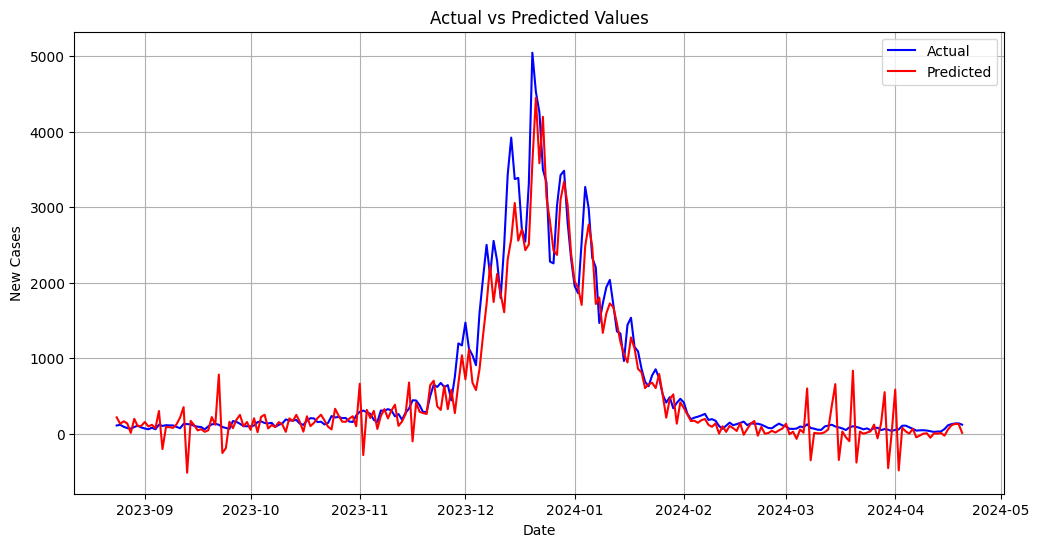

In [9]:
import matplotlib.pyplot as plt

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

predicted_df = pd.DataFrame({
    "date": actual_df["date"],
    "predicted_values": pred_linearregression[:,0]})

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(predicted_df["date"], predicted_df["predicted_values"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

In [10]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=200, random_state=50)
forest_model.fit(training_data_x, training_data_y)

pred_randomforest = forest_model.predict(test_data_x) 
  
mse = mean_squared_error(test_data_y.values, pred_randomforest)
mae = mean_absolute_error(test_data_y.values, pred_randomforest)
r2 = r2_score(test_data_y.values, pred_randomforest)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R Square Score: ", r2)

print("predicted values: ",pred_randomforest[:5], "actual values: ", test_data_y[:5].values)

Mean Squared Error:  145325.52624472615
Mean Absolute Error:  141.34043402489627
R Square Score:  -44.60977703257033
predicted values:  [[1.010350e+02 1.343200e+02 1.272049e+04 1.482000e+01 2.250000e-01
  1.899000e+01 4.055000e+00 5.230000e+00 4.635000e+00 2.377500e+01
  2.704000e+01 1.374000e+01 8.690000e+00 4.875000e+00 3.430000e+00
  5.565000e+00 7.365000e+00 8.077000e+01 1.270500e+01 7.621000e+01
  1.061000e+01 7.349000e+01 3.813500e+01 2.010000e+00 9.750000e-01]
 [9.621000e+01 1.396750e+02 1.270077e+04 1.479500e+01 1.450000e-01
  1.883500e+01 4.050000e+00 5.305000e+00 4.800000e+00 2.250000e+01
  2.613000e+01 1.244500e+01 8.175000e+00 4.520000e+00 3.415000e+00
  4.870000e+00 9.085000e+00 1.106800e+02 1.295500e+01 8.015500e+01
  1.055500e+01 7.158500e+01 3.961000e+01 2.775000e+00 1.000000e+00]
 [1.046050e+02 1.106750e+02 1.273408e+04 1.548000e+01 2.300000e-01
  2.004000e+01 3.845000e+00 5.360000e+00 5.095000e+00 2.420000e+01
  2.811000e+01 1.427500e+01 8.430000e+00 5.340000e+00 4.03

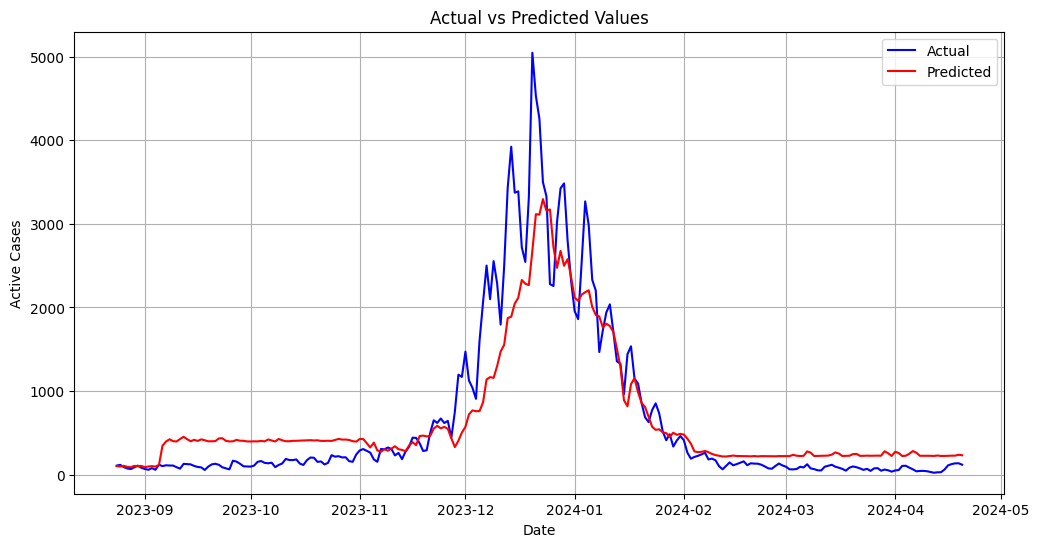

In [11]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

predicted_df = pd.DataFrame({
    "date": actual_df["date"],
    "predicted_values": pred_randomforest[:,0]})

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(predicted_df["date"], predicted_df["predicted_values"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

In [12]:
print(col_name)

['cases_new', 'cases_recovered', 'cases_active', 'cases_unvax', 'cases_pvax', 'cases_fvax', 'cases_0_4', 'cases_5_11', 'cases_12_17', 'cases_18_29', 'cases_30_39', 'cases_40_49', 'cases_50_59', 'cases_60_69', 'cases_70_79', 'cases_80', 'daily_partial', 'daily', 'admitted_covid_hospital', 'admitted_total_hospital', 'discharged_covid_hospital', 'discharged_total_hospital', 'hosp_covid_hospital', 'icu_covid', 'vent_covid']


In [13]:
data = df.loc[df.index.get_level_values('date') == "2024-04-20"]
data = data.drop(columns=col_name)

days = 90

result = []

next_day = model.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][count]
        count = count + 1
    
    next_day = model.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2024-04-21", periods=days + 1, freq='D')

print(result_df)

               cases_new  cases_recovered  cases_active   cases_unvax  \
2024-04-21  9.637633e+00    -1.087266e+02  8.153664e+03 -3.105625e+00   
2024-04-22  3.315038e+02    -1.542327e+03  9.657713e+03  1.230678e+02   
2024-04-23  2.920267e+02    -7.559996e+03  1.532394e+04  1.053761e+02   
2024-04-24  2.093859e+03    -3.470613e+04  4.327932e+04  8.993201e+02   
2024-04-25  8.489650e+03    -1.650848e+05  1.738018e+05  3.718883e+03   
...                  ...              ...           ...           ...   
2024-07-16  7.807766e+58    -1.520302e+60  1.529118e+60  3.447539e+58   
2024-07-17  3.654518e+59    -7.115956e+60  7.157219e+60  1.613661e+59   
2024-07-18  1.710540e+60    -3.330707e+61  3.350021e+61  7.552933e+59   
2024-07-19  8.006386e+60    -1.558977e+62  1.568017e+62  3.535240e+60   
2024-07-20  3.747484e+61    -7.296977e+62  7.339289e+62  1.654711e+61   

              cases_pvax    cases_fvax     cases_0_4    cases_5_11  \
2024-04-21 -1.196421e+01 -3.826861e+01 -6.708964e+00 

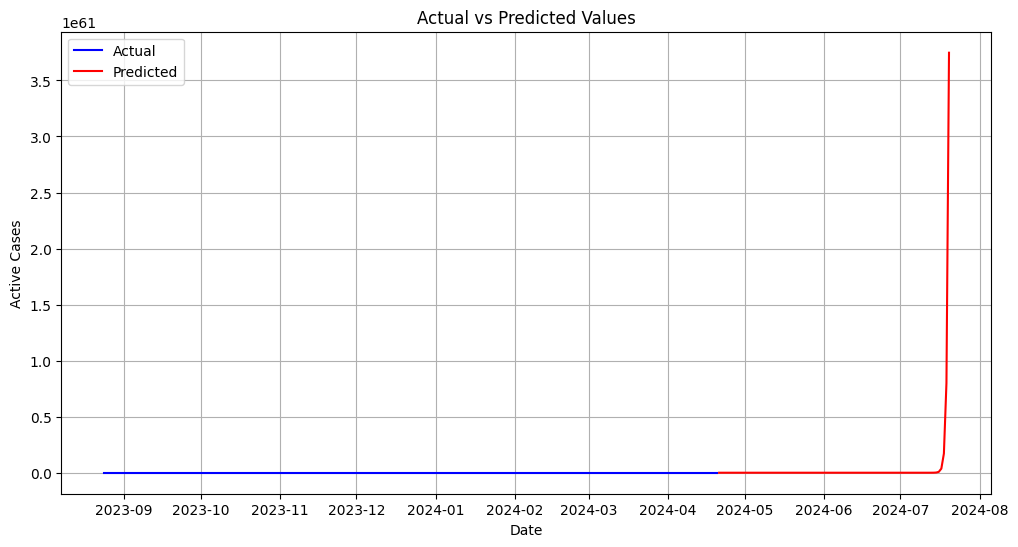

In [14]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

In [15]:
data = df.loc[df.index.get_level_values('date') == "2024-04-20"]
data = data.drop(columns=col_name)

days = 90

result = []

next_day = forest_model.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][count]
        count = count + 1
    
    next_day = forest_model.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2024-04-20", periods=days + 1, freq='D')

print(result_df)

            cases_new  cases_recovered  cases_active  cases_unvax  cases_pvax  \
2024-04-20    231.275          415.130      7536.235       29.360       0.950   
2024-04-21    236.270          427.815      7381.490       28.480       0.985   
2024-04-22    236.120          348.340      7373.105       27.805       1.420   
2024-04-23    242.910          287.085      7225.810       26.705       1.375   
2024-04-24    225.160          292.990      7181.000       23.710       1.365   
...               ...              ...           ...          ...         ...   
2024-07-15    215.675          243.130      7064.035       21.645       1.315   
2024-07-16    209.500          214.820      6991.475       20.365       1.010   
2024-07-17    216.255          243.875      7060.340       21.725       1.305   
2024-07-18    209.190          218.545      6985.170       20.835       0.925   
2024-07-19    215.675          243.130      7064.035       21.645       1.315   

            cases_fvax  cas

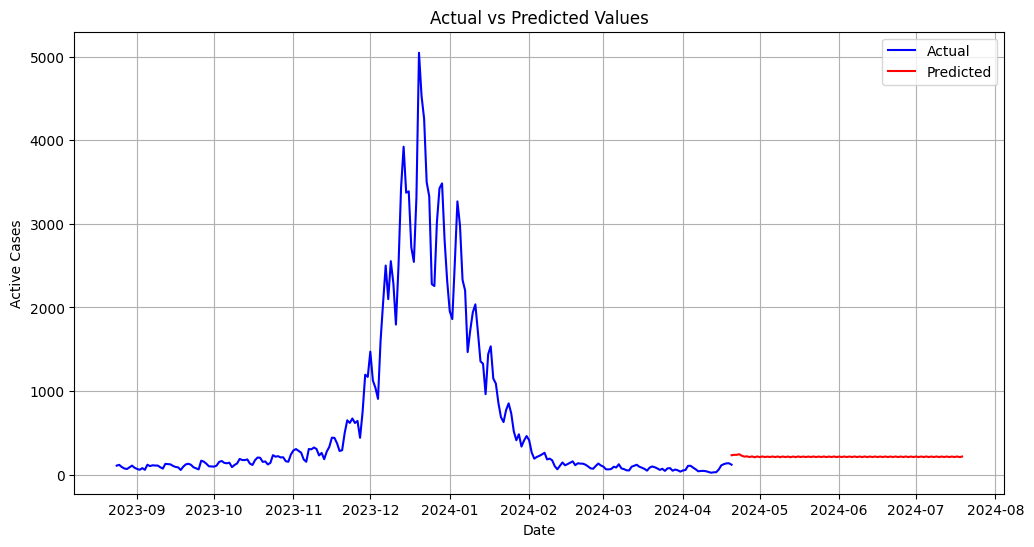

In [16]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

In [17]:
from datetime import date

d0 = date(2023, 6, 16)
d1 = date(2024, 4, 20)
delta = d1 - d0
print(delta.days)

data = df.loc[df.index.get_level_values('date') == "2023-06-16"]
data = data.drop(columns=col_name)

days = delta.days

result = []

next_day = forest_model.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][col_name.index(col)]
        count = count + 1
    
    next_day = forest_model.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2023-06-16", periods=days + 1, freq='D')

print(result_df)

309
            cases_new  cases_recovered  cases_active  cases_unvax  cases_pvax  \
2023-06-16    546.385          579.865     17874.035       56.320       2.215   
2023-06-17    502.375          569.195     18011.630       55.550       2.590   
2023-06-18    466.110          542.745     17787.220       52.995       2.225   
2023-06-19    480.690          565.405     17836.115       53.915       2.205   
2023-06-20    458.170          557.355     17704.670       51.900       2.150   
...               ...              ...           ...          ...         ...   
2024-04-16    451.960          568.505     17559.950       51.615       2.240   
2024-04-17    451.960          568.505     17559.950       51.615       2.240   
2024-04-18    451.960          568.505     17559.950       51.615       2.240   
2024-04-19    451.960          568.505     17559.950       51.615       2.240   
2024-04-20    451.960          568.505     17559.950       51.615       2.240   

            cases_fvax 

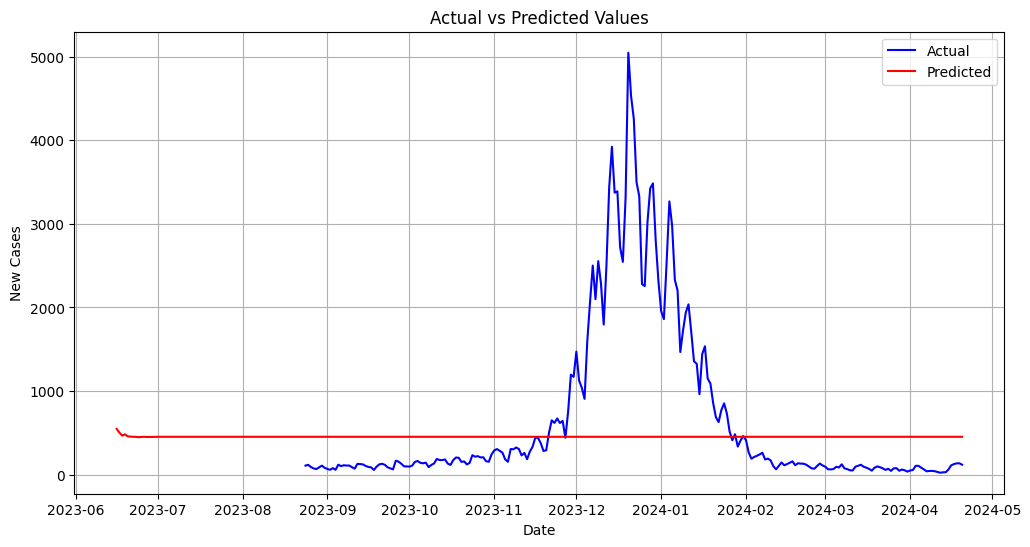

In [18]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

training_data_x_2023 = training_data_x.loc['2023-01-01':'2023-12-31']
training_data_y_2023 = training_data_y.loc['2023-01-01':'2023-12-31']

model_linear_2023 = LinearRegression()

model_linear_2023.fit(training_data_x_2023, training_data_y_2023)

pred_linearregression_2023 = model.predict(test_data_x) 
  
mse = mean_squared_error(test_data_y, pred_linearregression_2023)
mae = mean_absolute_error(test_data_y, pred_linearregression_2023)
r2 = r2_score(test_data_y, pred_linearregression_2023)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R Square Score: ", r2)

print("predicted values: ",pred_linearregression_2023[:5], "actual values: ", test_data_y[:5].values)

Mean Squared Error:  6882949.752335343
Mean Absolute Error:  433.6326365825347
R Square Score:  -11948.346535132336
predicted values:  [[ 2.15042515e+02  2.92167923e+02  1.26308742e+04  4.87293656e+01
   9.06381160e+00  1.23844753e+01  8.25392774e+00  3.88061055e+00
   8.54827037e+00  4.56503823e+01  5.88668946e+01  3.76352720e+01
   2.04256525e+01  1.28545146e+01  1.00273796e+01  1.14376956e+01
  -6.04507177e+01 -2.24991093e+03  2.03038340e+01  9.02493477e+01
   1.50111917e+01  8.57211613e+01  3.36181911e+01  3.98730112e-01
   9.97820191e-01]
 [ 1.29251851e+02  3.28316982e+02  1.25269250e+04  2.04554105e+01
  -6.61026305e+00  5.87381353e+00  7.47676638e-03  3.82678213e+00
  -1.69174273e+00  4.10420911e+01  3.54291154e+01  2.24676516e+01
   1.05567252e+01  5.15175411e+00  5.18364961e+00  1.02164417e+01
   1.03329657e+03  2.36546249e+03  2.06282163e+01  1.04163384e+02
   1.21659319e+01  9.26573438e+01  4.93209259e+01 -1.80860852e+00
   1.15760688e+00]
 [ 1.62419413e+02  3.17395977e+02  

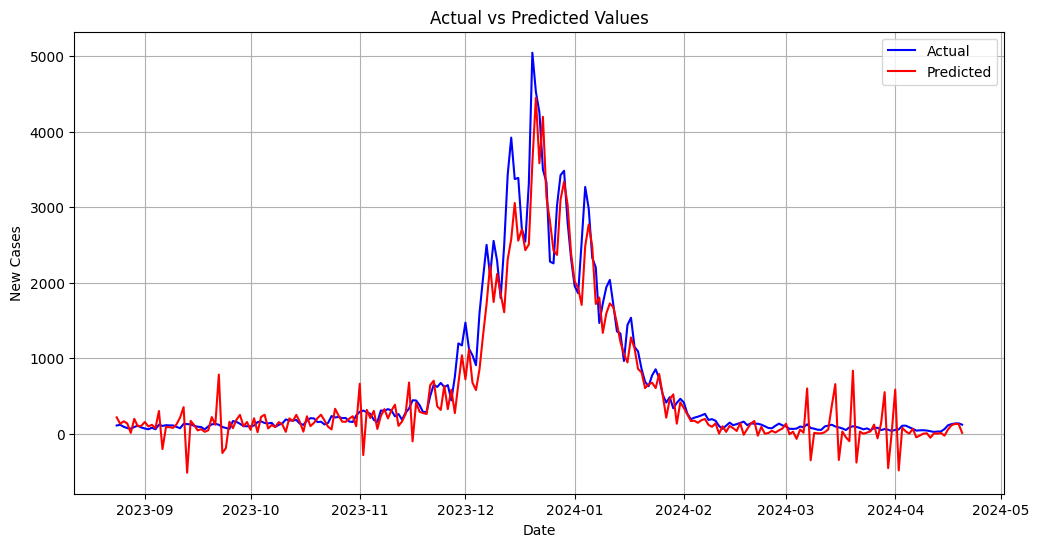

In [20]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

predicted_df = pd.DataFrame({
    "date": actual_df["date"],
    "predicted_values": pred_linearregression_2023[:,0]})

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(predicted_df["date"], predicted_df["predicted_values"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

In [21]:
from datetime import date

d0 = date(2023, 6, 16)
d1 = date(2024, 4, 20)
delta = d1 - d0
print(delta.days)

data = df.loc[df.index.get_level_values('date') == "2023-06-16"]
data = data.drop(columns=col_name)

days = delta.days

result = []

next_day = model_linear_2023.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][col_name.index(col)]
        count = count + 1
    
    next_day = forest_model.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2023-06-16", periods=days + 1, freq='D')

print(result_df)

309
             cases_new  cases_recovered  cases_active  cases_unvax  \
2023-06-16  421.970009       723.004025   17728.40965    46.324792   
2023-06-17  491.965000       563.520000   17954.47500    55.010000   
2023-06-18  447.730000       570.520000   17572.57000    50.015000   
2023-06-19  463.725000       573.170000   17737.03000    52.510000   
2023-06-20  444.270000       554.670000   17589.73500    50.490000   
...                ...              ...           ...          ...   
2024-04-16  451.960000       568.505000   17559.95000    51.615000   
2024-04-17  451.960000       568.505000   17559.95000    51.615000   
2024-04-18  451.960000       568.505000   17559.95000    51.615000   
2024-04-19  451.960000       568.505000   17559.95000    51.615000   
2024-04-20  451.960000       568.505000   17559.95000    51.615000   

            cases_pvax  cases_fvax  cases_0_4  cases_5_11  cases_12_17  \
2023-06-16    1.758792    74.06558   9.643138   14.482343    23.307351   
2023-06

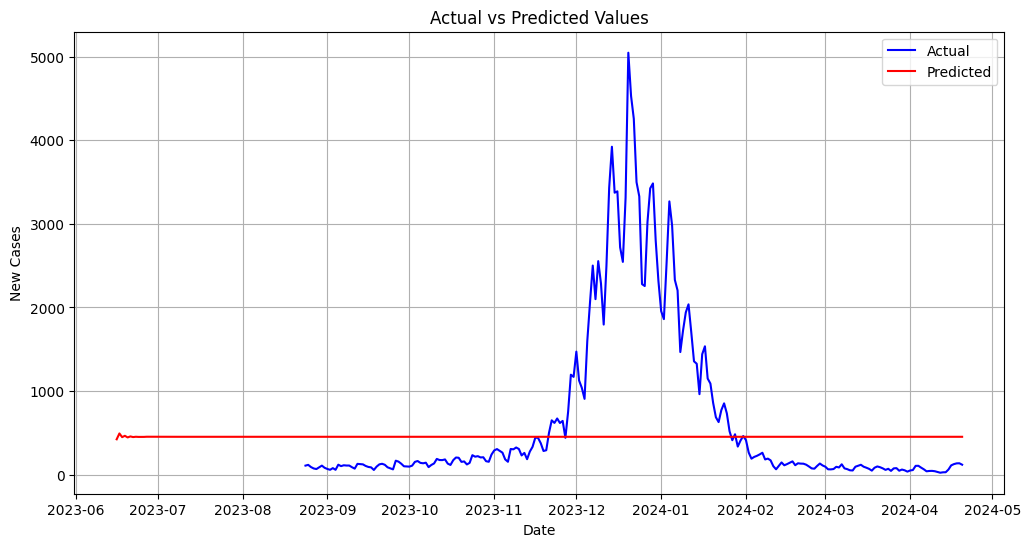

In [22]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

In [23]:
from statsmodels.tsa.api import VAR

split_index = int(0.8 * len(df))
train_data_var = df_var.iloc[:split_index]
test_data_var = df_var.iloc[split_index:]

d0 = date(2023, 8, 22)
d1 = date(2024, 4, 20)
delta = d1 - d0
days = delta.days

model_var = VAR(train_data_var)
model_var = model_var.fit(maxlags=10)

prediction = model_var.forecast(model_var.endog, steps=days+1)
forecast_df = pd.DataFrame(prediction, index=pd.date_range(start="2023-08-22", periods=days+1, freq='D'), columns=col_name)

mse = mean_squared_error(test_data_var, forecast_df)
mae = mean_absolute_error(test_data_var, forecast_df)
r2 = r2_score(test_data_var, forecast_df)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R Square Score: ", r2)


Mean Squared Error:  54326241.92388883
Mean Absolute Error:  2191.4980694332403
R Square Score:  -245755.93130527867


C:\Users\kelvi\PycharmProjects\MachineLearningTutorial\5011-cem-ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


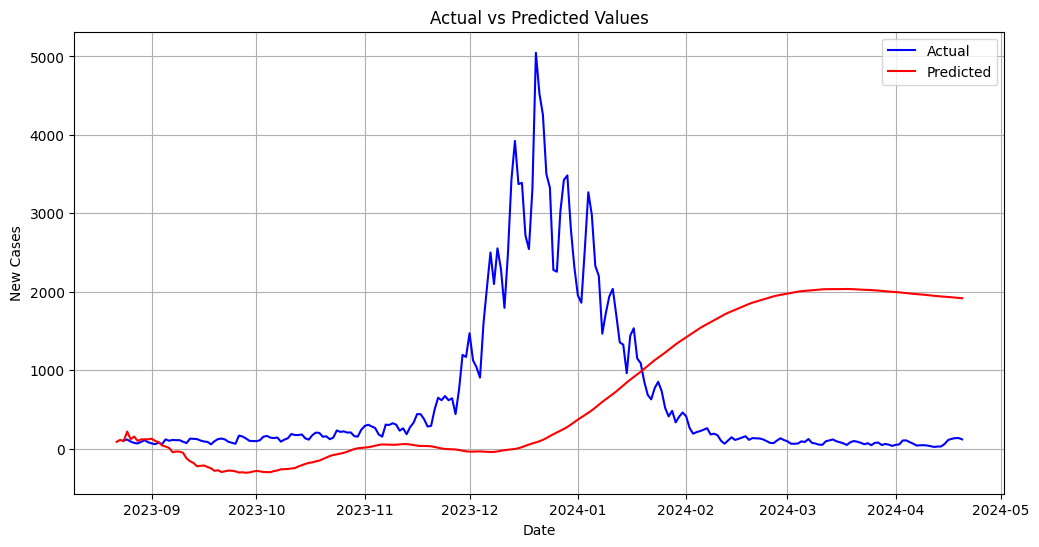

In [24]:
actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(forecast_df.index, forecast_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

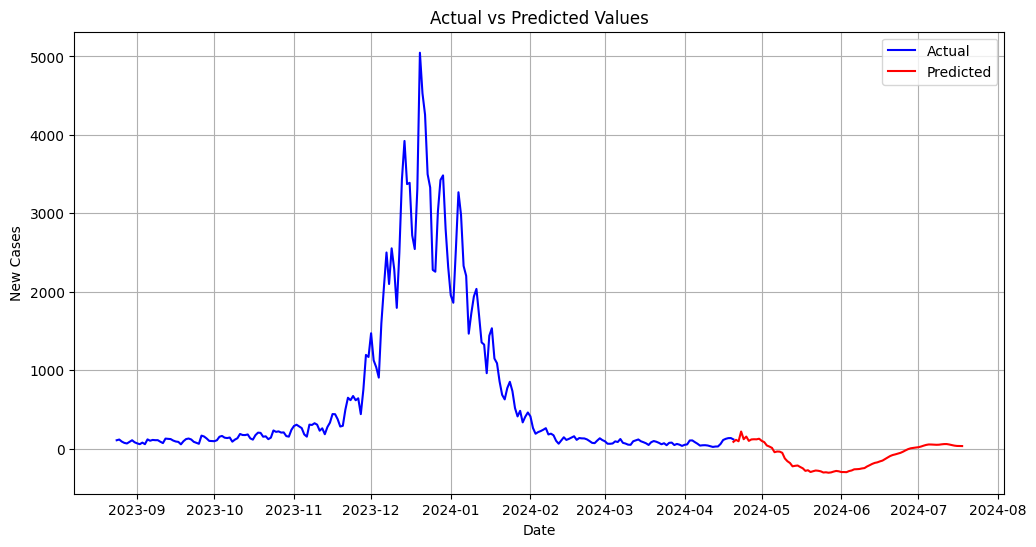

In [25]:
prediction = model_var.forecast(model_var.endog, steps=90)
forecast_df = pd.DataFrame(prediction, index=pd.date_range(start="2024-04-20", periods=90, freq='D'), columns=col_name)

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(forecast_df.index, forecast_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

Mean Squared Error:  15014859.66002637
Mean Absolute Error:  740.5295703720518
R Square Score:  0.6729915441841113
predicted values:  [[3.06675291e+04 2.92603162e+04 3.11477473e+05 4.64989807e+03
  6.32868583e+02 9.06396634e+03 1.73413802e+03 1.82533996e+03
  1.27640833e+03 8.25258997e+03 7.30745326e+03 4.23148498e+03
  2.76533978e+03 1.96072788e+03 8.92062630e+02 3.31997279e+02
  1.19382889e+04 6.85875436e+04 1.97585524e+03 2.50808940e+03
  1.69186130e+03 2.11068707e+03 7.45485604e+03 4.03205420e+02
  2.39432872e+02]] actual values:              cases_new_lag_1  cases_new_lag_2  cases_recovered_lag_1  \
date                                                                  
2022-03-10          30246.0          31490.0                26653.0   

            cases_recovered_lag_2  cases_active_lag_1  cases_active_lag_2  \
date                                                                        
2022-03-10                29035.0            310167.0            306687.0   

            c

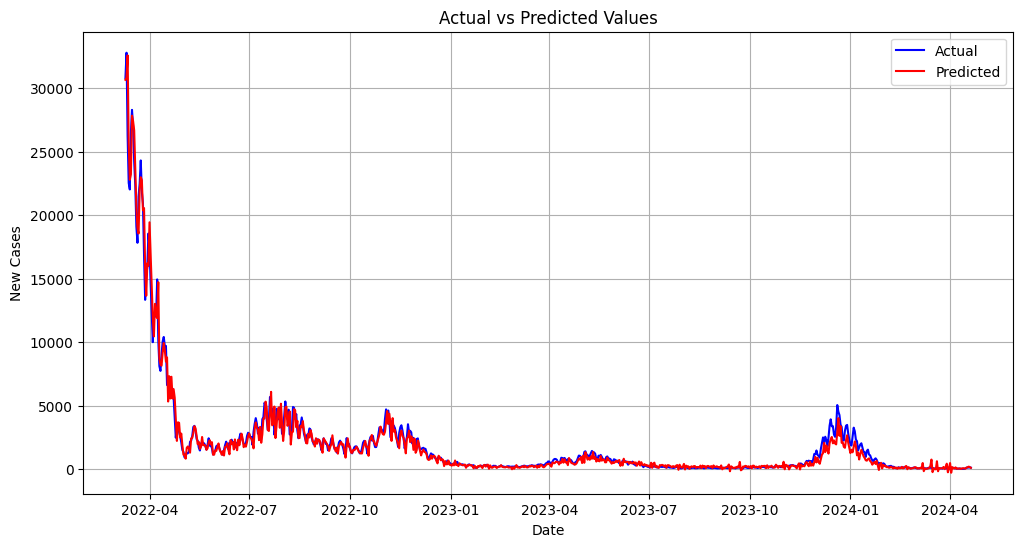

In [26]:
import pickle
model_linearregression_all = LinearRegression()

model_linearregression_all.fit(training_data_x_all, training_data_y_all)

with open("linear_regression_model.pkl", "wb") as file:
    pickle.dump(model_linearregression_all, file)

pred_linearregression_all = model_linearregression_all.predict(test_data_x_all) 
  
mse = mean_squared_error(test_data_y_all, pred_linearregression_all)
mae = mean_absolute_error(test_data_y_all, pred_linearregression_all)
r2 = r2_score(test_data_y_all, pred_linearregression_all)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R Square Score: ", r2)

print("predicted values: ",pred_linearregression_all[:1], "actual values: ", test_data_x_all[:1])

actual_df = pd.DataFrame({"date": test_data_y_all.index, "cases_new": test_data_y_all["cases_new"]})

predicted_df = pd.DataFrame({
    "date": actual_df["date"],
    "predicted_values": pred_linearregression_all[:,0]})

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(predicted_df["date"], predicted_df["predicted_values"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

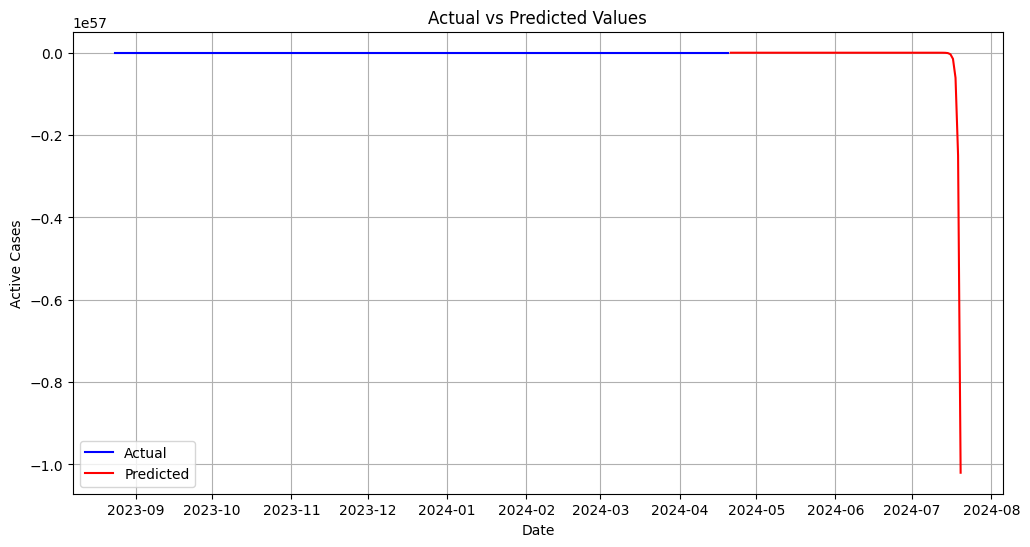

In [27]:
data = df.loc[df.index.get_level_values('date') == "2024-04-20"]
data = data.drop(columns=col_name)

days = 90

result = []

next_day = model_linearregression_all.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][count]
        count = count + 1
    
    next_day = model_linearregression_all.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2024-04-21", periods=days + 1, freq='D')

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

Mean Squared Error:  701552704.1990258
Mean Absolute Error:  5345.319232858997
R Square Score:  -4.39173149445445
predicted values:  [[2.97164050e+04 2.84958850e+04 3.07289575e+05 4.30553500e+03
  6.11855000e+02 9.37756000e+03 1.67960000e+03 1.86328500e+03
  1.27416500e+03 8.04859000e+03 7.10704500e+03 4.07261000e+03
  2.64629000e+03 1.78181500e+03 8.37285000e+02 3.16265000e+02
  2.17839450e+04 6.87331350e+04 1.89969000e+03 2.44183500e+03
  1.55487500e+03 1.98821500e+03 7.41606000e+03 3.79635000e+02
  2.24180000e+02]] actual values:              cases_new  cases_recovered  cases_active  cases_unvax  cases_pvax  \
date                                                                            
2022-03-10      30787            26457        314427         4429         668   

            cases_fvax  cases_0_4  cases_5_11  cases_12_17  cases_18_29  \
date                                                                      
2022-03-10        9082       1815        1900         1293        

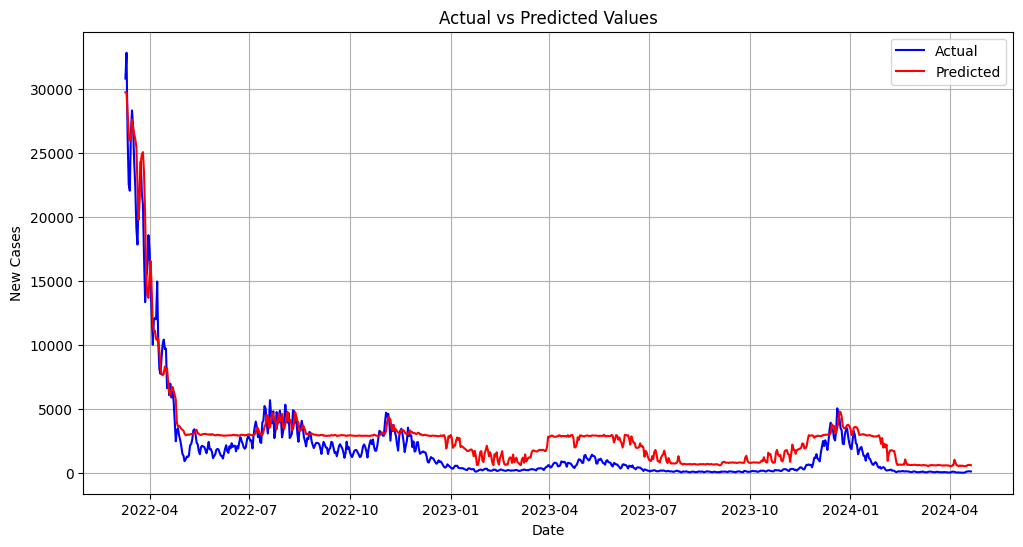

In [28]:
forest_model_all = RandomForestRegressor(n_estimators=200, random_state=50)
forest_model_all.fit(training_data_x_all, training_data_y_all)

with open("random_forest_regression_model.pkl", "wb") as file:
    pickle.dump(forest_model_all, file)

pred_randomforest_all = forest_model_all.predict(test_data_x_all) 
  
mse = mean_squared_error(test_data_y_all, pred_randomforest_all)
mae = mean_absolute_error(test_data_y_all, pred_randomforest_all)
r2 = r2_score(test_data_y_all, pred_randomforest_all)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R Square Score: ", r2)

print("predicted values: ",pred_randomforest_all[:1], "actual values: ", test_data_y_all[:1])

actual_df = pd.DataFrame({"date": test_data_y_all.index, "cases_new": test_data_y_all["cases_new"]})

predicted_df = pd.DataFrame({
    "date": actual_df["date"],
    "predicted_values": pred_randomforest_all[:,0]})

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(predicted_df["date"], predicted_df["predicted_values"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

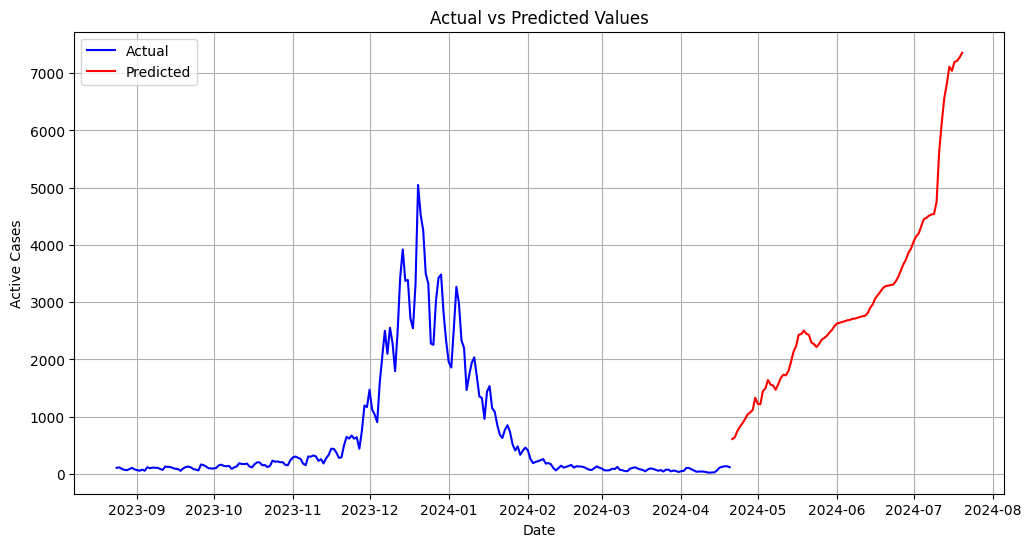

In [29]:
data = df.loc[df.index.get_level_values('date') == "2024-04-20"]
data = data.drop(columns=col_name)

days = 90

result = []

next_day = forest_model_all.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][count]
        count = count + 1
    
    next_day = forest_model_all.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2024-04-21", periods=days + 1, freq='D')

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

C:\Users\kelvi\PycharmProjects\MachineLearningTutorial\5011-cem-ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error:  352436139.4314515
Mean Absolute Error:  5977.277228755612
R Square Score:  -42160.04374863759


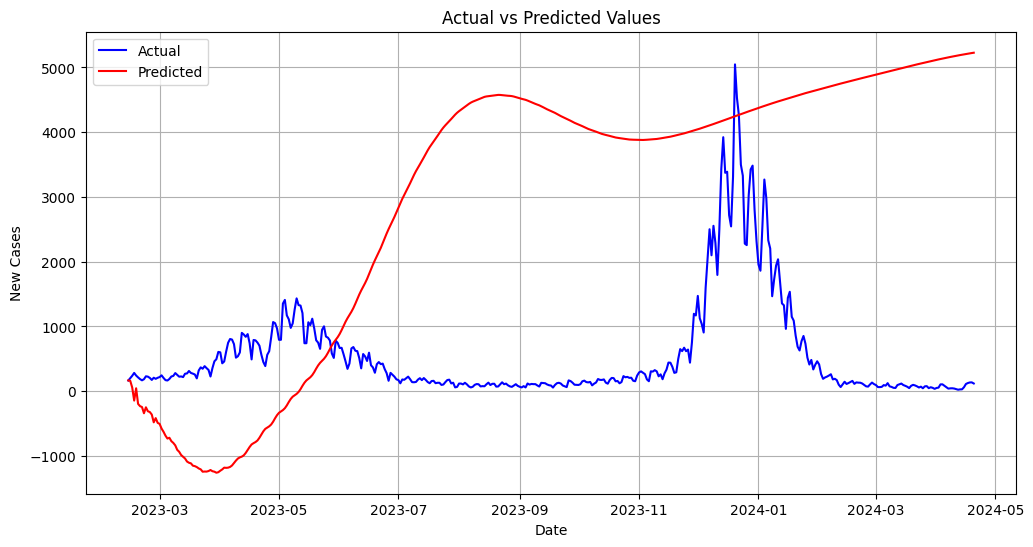

In [30]:
split_index = int(0.5 * len(df_all))
train_data_var = df_var.iloc[:split_index]
test_data_var = df_var.iloc[split_index:]

d0 = date(2023, 2, 13)
d1 = date(2024, 4, 20)
delta = d1 - d0
days = delta.days

model_var = VAR(train_data_var)
model_var = model_var.fit(maxlags=10)

with open('VAR_model.pkl', 'wb') as file:
    pickle.dump(model_var, file)

prediction = model_var.forecast(model_var.endog, steps=days+1)
forecast_df = pd.DataFrame(prediction, index=pd.date_range(start="2023-02-13", periods=days+1, freq='D'), columns=col_name)

mse = mean_squared_error(test_data_var, forecast_df)
mae = mean_absolute_error(test_data_var, forecast_df)
r2 = r2_score(test_data_var, forecast_df)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("R Square Score: ", r2)

actual_df = pd.DataFrame({"date": test_data_var.index, "cases_new": test_data_var["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(forecast_df.index, forecast_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()


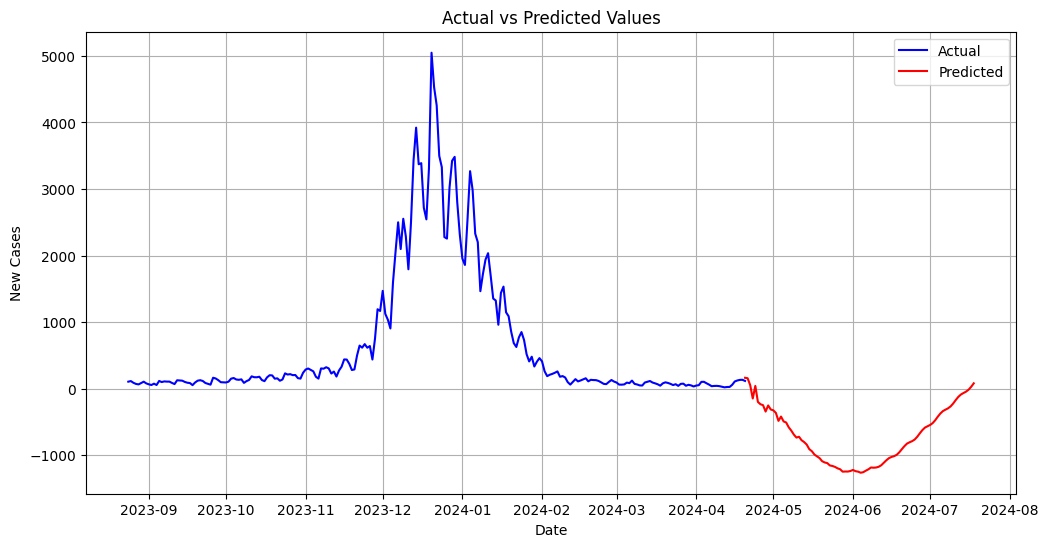

In [31]:
prediction = model_var.forecast(model_var.endog, steps=90)
forecast_df = pd.DataFrame(prediction, index=pd.date_range(start="2024-04-20", periods=90, freq='D'), columns=col_name)

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(forecast_df.index, forecast_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()

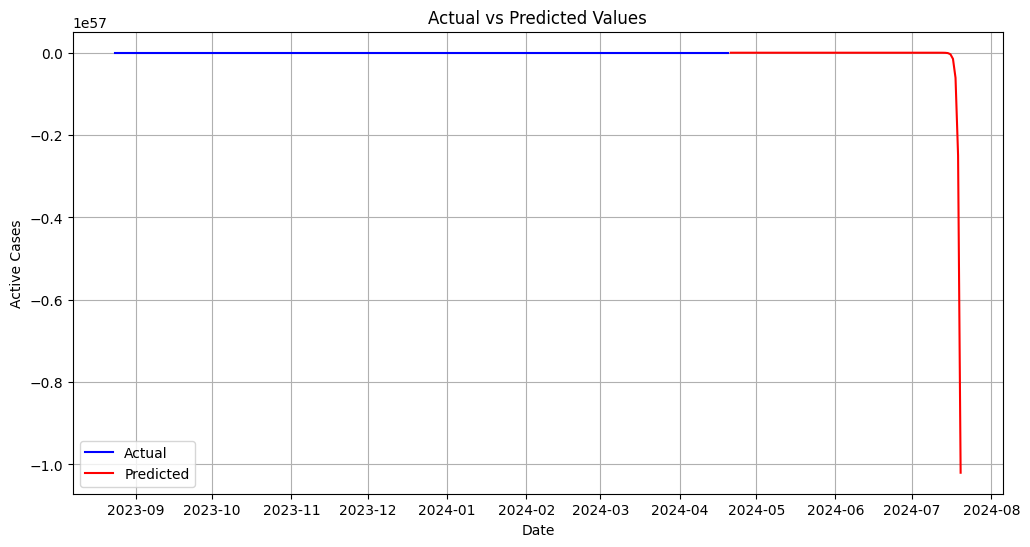

In [32]:
with open('linear_regression_model.pkl', 'rb') as file:
    linear_regression_model = pickle.load(file)

data = df.loc[df.index.get_level_values('date') == "2024-04-20"]
data = data.drop(columns=col_name)

days = 90

result = []

next_day = linear_regression_model.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][count]
        count = count + 1
    
    next_day = linear_regression_model.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2024-04-21", periods=days + 1, freq='D')

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

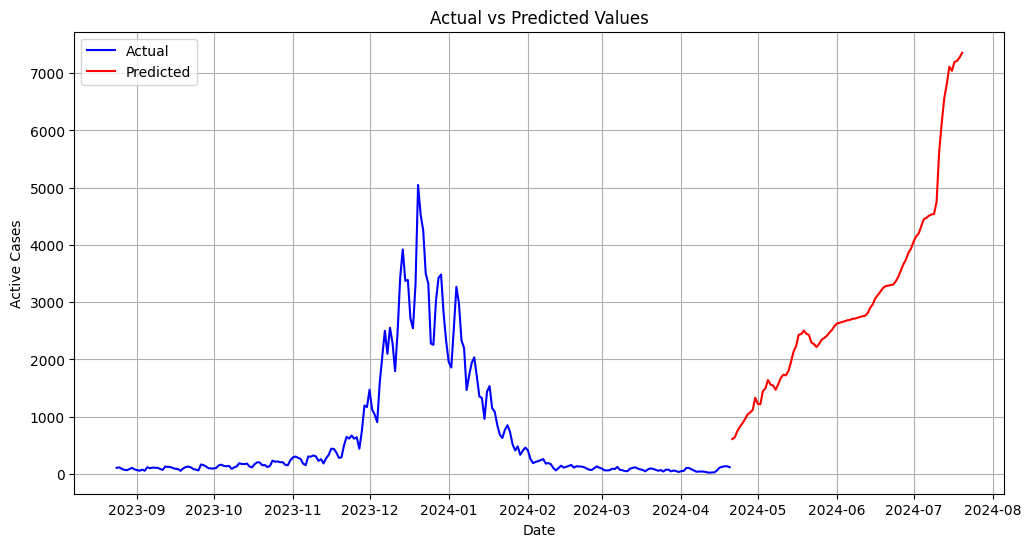

In [33]:
with open('random_forest_regression_model.pkl', 'rb') as file:
    random_forest_model = pickle.load(file)

data = df.loc[df.index.get_level_values('date') == "2024-04-20"]
data = data.drop(columns=col_name)

days = 90

result = []

next_day = random_forest_model.predict(data)
result.append(next_day[0])

for i in range(days):
    count=0
    for col in col_name:
        data[f"{col}_lag_1"] = data[f"{col}_lag_2"]
        data[f"{col}_lag_2"] = next_day[0][count]
        count = count + 1
    
    next_day = random_forest_model.predict(data)
    result.append(next_day[0])
    
result_df = pd.DataFrame(result, columns=col_name)
result_df.index = pd.date_range(start="2024-04-21", periods=days + 1, freq='D')

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(result_df["date"], result_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.grid(True)

plt.show()

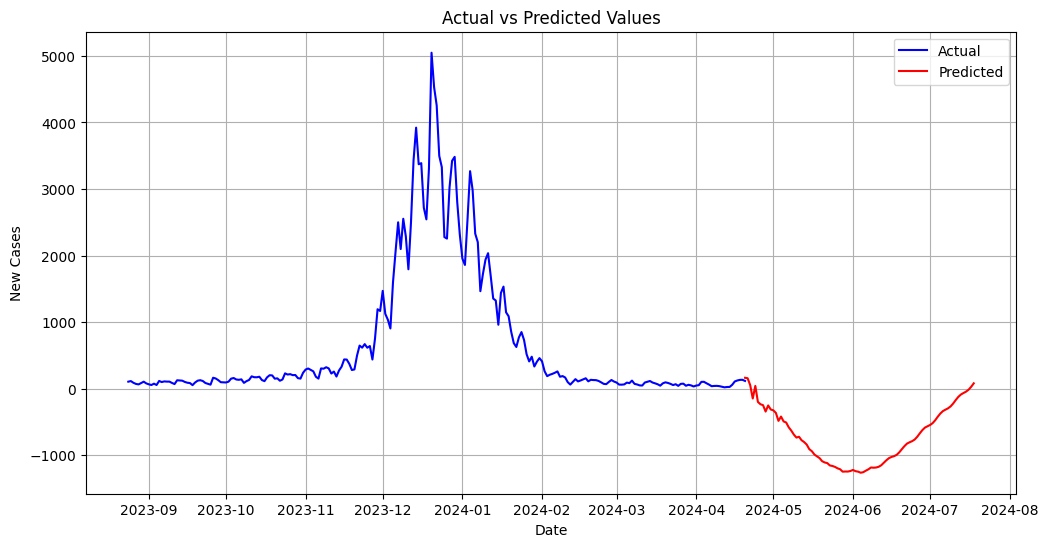

In [34]:
with open('VAR_model.pkl', 'rb') as file:
    var_model = pickle.load(file)

prediction = var_model.forecast(var_model.endog, steps=90)
forecast_df = pd.DataFrame(prediction, index=pd.date_range(start="2024-04-20", periods=90, freq='D'), columns=col_name)

actual_df = pd.DataFrame({"date": test_data_y.index, "cases_new": test_data_y["cases_new"]})

result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'date'}, inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(actual_df["date"], actual_df["cases_new"], color="blue", label="Actual")

plt.plot(forecast_df.index, forecast_df["cases_new"], color="red", label="Predicted")

plt.title("Actual vs Predicted Values")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)

plt.show()